In [336]:
import numpy as np 
import pandas as pd

In [337]:
df = pd.read_csv('spam.csv' , encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [338]:
df.shape

(5572, 5)

1.  Data Cleaning
2.  EDA
3. Text Preprocessing
4.  Model Building 
5.  Evaluation
6.  Improvement
7.  Website
8.  Deploy

# Data Cleaning

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [340]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [341]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [342]:
df.rename(columns={ 'v1': 'target', 'v2': 'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [343]:
from sklearn.preprocessing import LabelEncoder
encoder  =LabelEncoder()

In [344]:
df['target'] = encoder.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [345]:
# mising values
df.isnull().sum()

target    0
text      0
dtype: int64

In [346]:
# duplicated
df.duplicated().sum()

403

In [347]:
df= df.drop_duplicates(keep='first')

In [348]:
df.shape

(5169, 2)

# EDA

In [349]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x31c8ee890>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'sapm')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

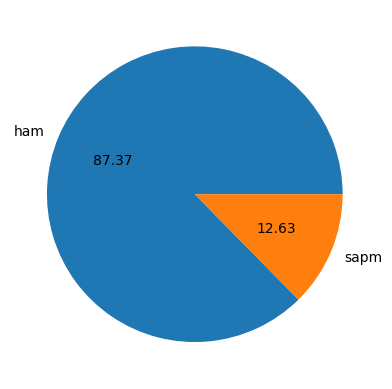

In [350]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'sapm'], autopct='%0.2f')

In [351]:
import nltk, ssl

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prajapativaibhavyogeshkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prajapativaibhavyogeshkumar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [352]:
df.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [353]:
df['num_char'] = df['text'].apply(len)
df

/var/folders/04/t1b_ypq50x70l_s73qxjgvj00000gn/T/ipykernel_60371/245442763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [354]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

/var/folders/04/t1b_ypq50x70l_s73qxjgvj00000gn/T/ipykernel_60371/2971413714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [355]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

/var/folders/04/t1b_ypq50x70l_s73qxjgvj00000gn/T/ipykernel_60371/669858555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [356]:
df[['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [357]:
# spam 
df[df['target']==0][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [358]:
# ham 
df[df['target']==1][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [359]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

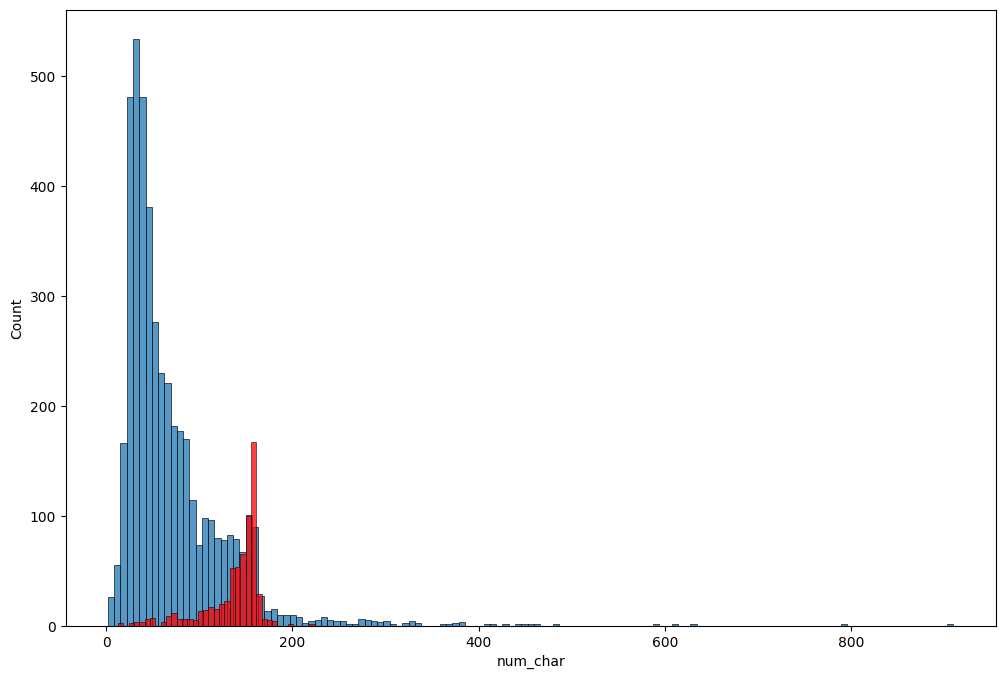

In [360]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='red')

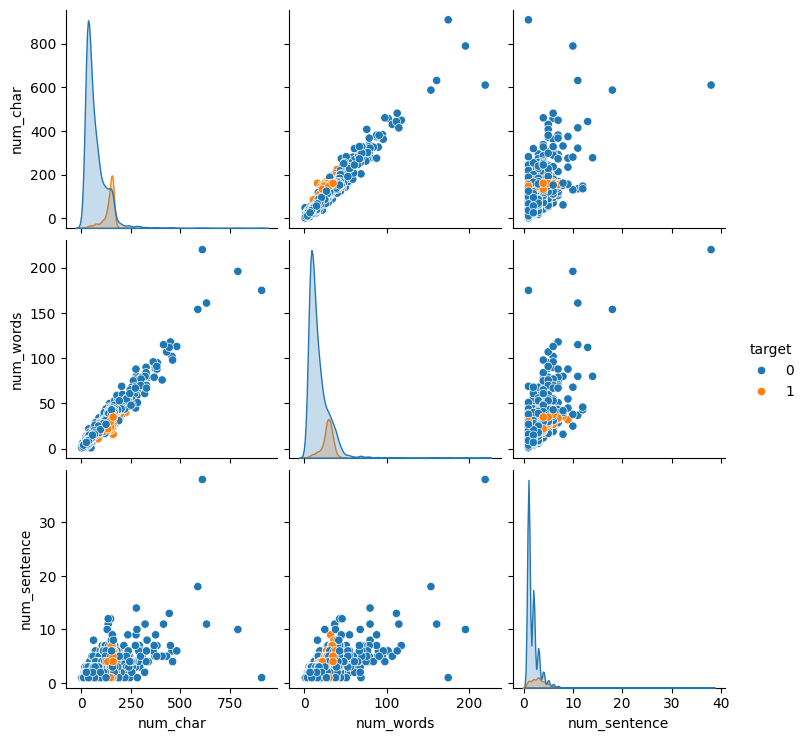

In [361]:
sns.pairplot(df, hue='target')

In [362]:
df

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

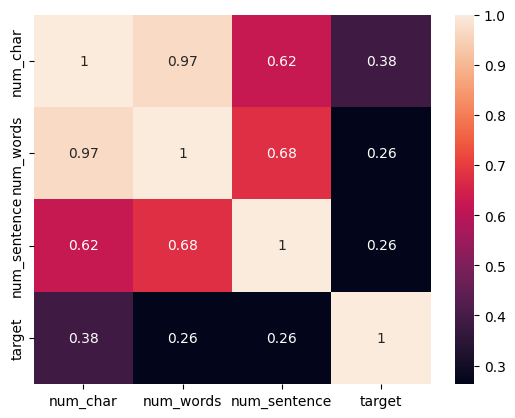

In [363]:
sns.heatmap(df[['num_char', 'num_words', 'num_sentence', 'target']].corr(), annot=True)

# Data Preprocessing

- lowercase
- tokenize
- special character removal
- stopwords and punctuation removal 
- stemming

In [364]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()

In [365]:
from nltk.corpus import stopwords
import string

def data_preprocessing(text):
    # lowercase
    text = text.lower()
    # tokenize
    text = nltk.word_tokenize(text)
    y=[]
    # special character remove
    for t in text:
        if t.isalnum():
            y.append(t)
    # stopwords and punctuation removal
    swt=[]
    for t in y:
        if t not in stopwords.words('english') and t not in string.punctuation:
            swt.append(t)
    # stemming
    stt=[]
    for t in swt:
        stt.append(ps.stem(t))
    
    return " ".join(stt)
    
    


In [366]:
df['transformed_text'] = df['text'].apply(data_preprocessing)
df


/var/folders/04/t1b_ypq50x70l_s73qxjgvj00000gn/T/ipykernel_60371/3849722924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(data_preprocessing)


,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [367]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [368]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

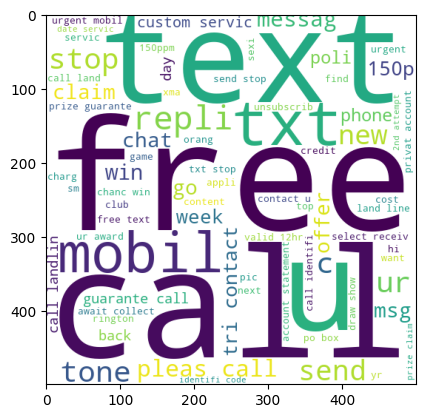

In [369]:
plt.imshow(spam_wc)

In [370]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

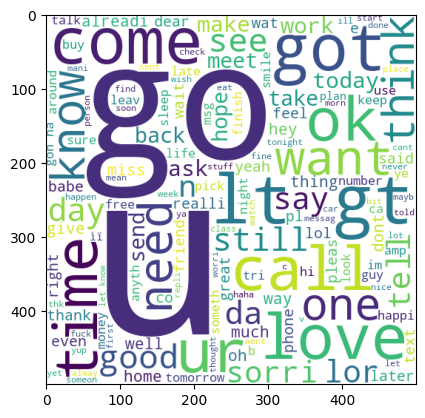

In [371]:
plt.imshow(ham_wc)

# Model Building

In [372]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [373]:
x = cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [374]:
x.shape

(5169, 6708)

In [375]:
y=df['target'].values

In [376]:
from sklearn.model_selection import train_test_split


In [377]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [378]:
x_train.shape

(4135, 6708)

In [379]:
x_test.shape

(1034, 6708)

In [380]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [381]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [382]:
def accuracy_print(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{model}: accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{model}: precission: {precision_score(y_test, y_pred)}')
    print(f'{model}: confusion metrics: {confusion_matrix(y_test, y_pred)}')
    

In [383]:
accuracy_print(gb)
accuracy_print(mb)
accuracy_print(bb)

GaussianNB(): accuracy: 0.8617021276595744
GaussianNB(): precission: 0.4831932773109244
GaussianNB(): confusion metrics: [[776 123]
 [ 20 115]]
MultinomialNB(): accuracy: 0.9680851063829787
MultinomialNB(): precission: 0.8541666666666666
MultinomialNB(): confusion metrics: [[878  21]
 [ 12 123]]
BernoulliNB(): accuracy: 0.9535783365570599
BernoulliNB(): precission: 0.9484536082474226
BernoulliNB(): confusion metrics: [[894   5]
 [ 43  92]]


In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [385]:
x = tf.fit_transform(df['transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [386]:
y=df['target'].values

In [387]:
from sklearn.model_selection import train_test_split

In [388]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [389]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [390]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [391]:
def accuracy_print(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{model}: accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{model}: precission: {precision_score(y_test, y_pred)}')
    print(f'{model}: confusion metrics: {confusion_matrix(y_test, y_pred)}')
    

In [392]:
accuracy_print(gb)
accuracy_print(mb)
accuracy_print(bb)

GaussianNB(): accuracy: 0.8607350096711799
GaussianNB(): precission: 0.48068669527896996
GaussianNB(): confusion metrics: [[778 121]
 [ 23 112]]
MultinomialNB(): accuracy: 0.9526112185686654
MultinomialNB(): precission: 1.0
MultinomialNB(): confusion metrics: [[899   0]
 [ 49  86]]
BernoulliNB(): accuracy: 0.9535783365570599
BernoulliNB(): precission: 0.9484536082474226
BernoulliNB(): confusion metrics: [[894   5]
 [ 43  92]]


In [393]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mb, open('model.pkl', 'wb'))